# The Ionosphere Dataset

The Ionosphere dataset was published back in 1989 by Sigillito et al. [here](https://www.semanticscholar.org/paper/Classification-of-radar-returns-from-the-ionosphere-Sigillito-Wing/e0d2de05caacdfa8073b2b4f77c5e72cb2449b81). The paper describes how radar signals backscattered by ionospheric density irregularities or clutter can provide meaningful information for "classification of ionospheric/magnetospheric regions or boundaries" amongst other applications. However, discriminating between backscattered signals that are "usable" or "not usable" is an extremely time-consuming task when undertaken manually.

The paper proposes training feedforward neural networks to perform this discrimination automatically, and is able to do so at a *92%* test accuracy with a single layer network, and *98.0%* test accuracy with a multilayer network.

This notebook aims to use **feature engineering** to reach comparable performance via a simple **logistic regression** model.

# Package Imports

In [525]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Exploratory Data Analysis

The signal is given in the form of 17, time-lagged radar readings with both a real and imaginary component. The "even" features (0, 2, 4, ..., 32) are the real components, while the "odd" features are the imaginary components (1, 3, ..., 33). The 34th column provides the data label as either "g" (good) or "b" (bad).

In [590]:
ionosphere_data = pd.read_csv('data/ionosphere.data', header=None)
ionosphere_data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [527]:
ionosphere_data.rename(columns = {34:'label'}, inplace=True)
ionosphere_data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


We start by splitting the data in train, val and test sets before doing any exploratory data analysis to prevent leakage of information from the validaton/test set into our feature engineering process.

In [528]:
ionosphere_train, ionosphere_test = train_test_split(ionosphere_data, test_size=0.15, random_state=42)

In [529]:
ionosphere_train.reset_index(inplace=True,drop=True)
ionosphere_test.reset_index(inplace=True, drop=True)

There are no null features nor any missing labels.

In [530]:
ionosphere_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       298 non-null    int64  
 1   1       298 non-null    int64  
 2   2       298 non-null    float64
 3   3       298 non-null    float64
 4   4       298 non-null    float64
 5   5       298 non-null    float64
 6   6       298 non-null    float64
 7   7       298 non-null    float64
 8   8       298 non-null    float64
 9   9       298 non-null    float64
 10  10      298 non-null    float64
 11  11      298 non-null    float64
 12  12      298 non-null    float64
 13  13      298 non-null    float64
 14  14      298 non-null    float64
 15  15      298 non-null    float64
 16  16      298 non-null    float64
 17  17      298 non-null    float64
 18  18      298 non-null    float64
 19  19      298 non-null    float64
 20  20      298 non-null    float64
 21  21      298 non-null    float64
 22  22

In [531]:
ionosphere_train['label'].value_counts()

g    194
b    104
Name: label, dtype: int64

We see that there are more good examples than bad examples, but no severe skewing. 

Text(0.5, 1.0, 'Label Distribution')

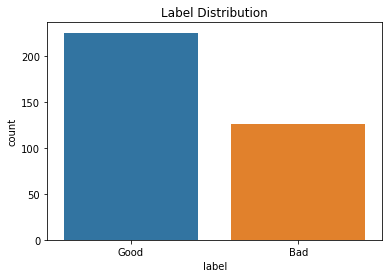

In [532]:
fig = sns.countplot(x='label', data=ionosphere_data)
plt.xticks(np.arange(2), ["Good", "Bad"])
plt.title("Label Distribution")

#More bad examples than good examples

In computing statistical metrics of each column, its observed that the second column (the first imaginary reading) is ALL zeros. Thus this is a **zero variance predictor** and provides no additional information. It can be dropped before training any models.

It's also observed that features are bounded between -1 and 1, and that the mean for imaginary features is typically smaller than those for the real features.

In [533]:
ionosphere_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,298.000000,298.0,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.892617,0.0,0.650708,0.014047,0.609705,0.115762,0.568187,0.100235,0.524132,0.174577,...,0.411287,-0.056966,0.548218,-0.060028,0.385137,-0.046585,0.360436,0.004759,0.358392,0.010269
std,0.310120,0.0,0.498457,0.447381,0.525085,0.458115,0.491967,0.517054,0.519443,0.479678,...,0.574199,0.503335,0.521692,0.553056,0.581067,0.509759,0.581169,0.524257,0.524613,0.467045
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.483323,-0.078827,0.428672,-0.026435,0.275173,-0.056368,0.143827,-0.046038,...,0.000000,-0.295722,0.330307,-0.420000,0.000000,-0.258570,0.000000,-0.250748,0.000000,-0.188195
50%,1.000000,0.0,0.881065,0.008750,0.833680,0.021170,0.771980,0.011710,0.702940,0.023080,...,0.564405,-0.010615,0.719225,-0.015610,0.518990,0.000000,0.452130,0.000000,0.419280,0.000000
75%,1.000000,0.0,1.000000,0.160988,1.000000,0.310965,0.979670,0.366835,0.961083,0.500633,...,0.911137,0.157922,1.000000,0.154862,0.903390,0.132035,0.874508,0.211528,0.837938,0.166615
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


To get a better sense of the data, we plot the first few examples in their natural form (real/imaginary time series).

Based on initial observations, the bad examples seem to have more variance in both the imaginary and real time-series (i.e. they oscillate more wildly). Additionally, in the good examples, the real time series and the imaginary time series don't overlap as often and their magnitudes appear to maintain a bit more of an absolute distance away from eachother.

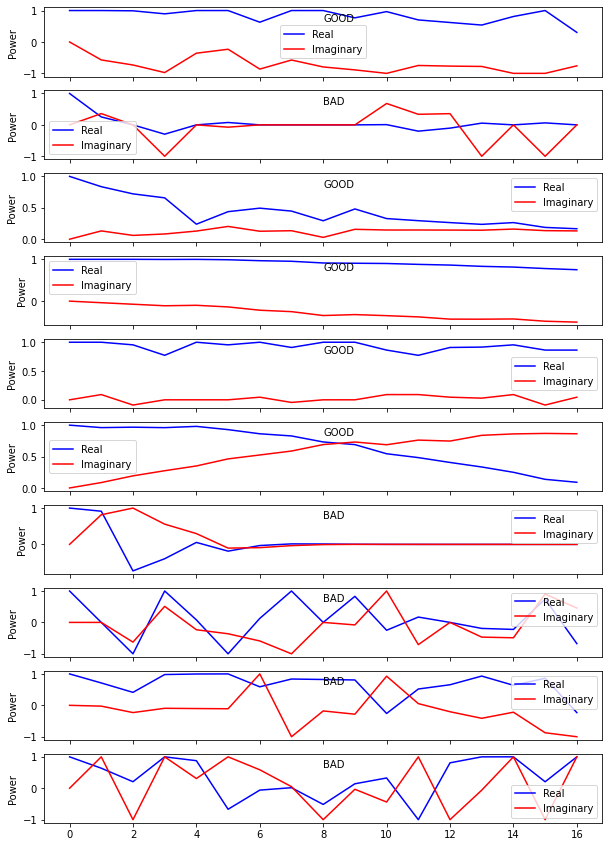

In [534]:
fig, axs = plt.subplots(10, 1, sharex='col')

for i in range(10):
    example = list(ionosphere_train.loc[i])
    real = example[0:-1:2]
    imaginary = example[1::2]

    axs[i].plot(np.arange(len(real)), real, 'b', label="Real")
    axs[i].plot(np.arange(len(imaginary)), imaginary, 'r', label="Imaginary")
    axs[i].set_ylabel("Power")
    axs[i].legend()

    if example[-1] == 'g':
        plt.text(0.5, 0.8,'GOOD', transform = axs[i].transAxes)
    else:
        plt.text(0.5, 0.8,'BAD', transform = axs[i].transAxes)

fig.set_size_inches(10, 15)

We continue by exploring basic statistical measures of each time series. We start by plotting the mean time series for the good and bad examples and find that, as we observed, the good examples tend to maintain a larger separation between the real and imaginary time series. 

This might indicate that mean distance between the real/imaginary time series would be a good feature to engineer, but it's important to realize that taking this mean is a **linear operation** on our features and, in reality, would provide no new information.

Text(0.5, 0.07, 'Time')

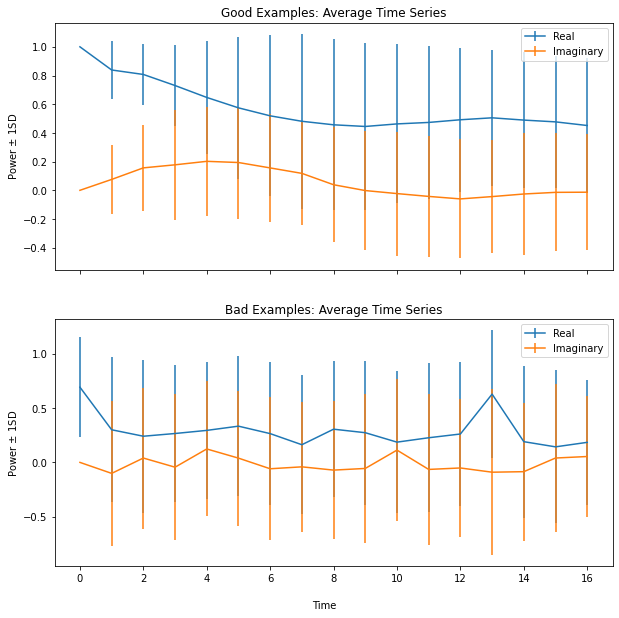

In [535]:
#Show average time series for GOOD vs BAD examples
good_means = np.mean(ionosphere_train[ionosphere_train["label"] == "g"], axis=0)
bad_means = np.mean(ionosphere_train[ionosphere_train["label"] == "b"], axis=0)

good_std = np.std(ionosphere_train[ionosphere_train["label"] == "g"], axis=0)
bad_std = np.std(ionosphere_train[ionosphere_train["label"] == "b"], axis=0)

fig, axs = plt.subplots(2, sharex='col')
axs[0].errorbar(np.arange(17), good_means[0:-1:2], yerr = good_std[0:-1:2], label="Real")
axs[0].errorbar(np.arange(17), good_means[1::2], yerr = good_std[1::2], label="Imaginary")
axs[0].legend()
axs[0].set_title("Good Examples: Average Time Series")
axs[0].set_ylabel("Power $\pm$ 1SD")

axs[1].errorbar(np.arange(17), bad_means[0:-1:2], yerr = bad_std[0:-1:2], label="Real")
axs[1].errorbar(np.arange(17), bad_means[1::2], yerr = bad_std[1::2], label="Imaginary")
axs[1].legend()
axs[1].set_title("Bad Examples: Average Time Series")
axs[1].set_ylabel("Power $\pm$ 1SD")

fig.set_size_inches(10.0, 10.0)
fig.text(0.5, 0.07, 'Time', ha='center', va='center')

Next, we visualizing the standard deviation of the good and bad time series, and observe that good examples tend to have a lower standard deviation in both the real and imaginary series. 

Text(0.5, 1.0, 'Standard Deviations: Good vs. Bad Examples')

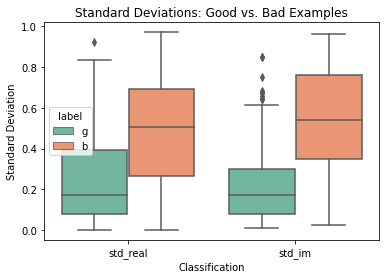

In [536]:
real_std = np.std(ionosphere_train[ionosphere_train.columns[0:-1:2]], axis=1)
im_std = np.std(ionosphere_train[ionosphere_train.columns[1:-1:2]], axis=1)
std_df = pd.DataFrame({'std_real': real_std, 'std_im': im_std}, dtype=float)

std_melted = pd.melt(pd.concat([std_df, ionosphere_train['label']], axis=1), id_vars=["label"], value_vars=["std_real", "std_im"], var_name = "Classification", value_name = "Standard Deviation")
sns.boxplot(x="Classification", y="Standard Deviation", hue="label", data=std_melted, palette="Set2")

plt.title("Standard Deviations: Good vs. Bad Examples")

Next we observe the distribution of sample means for both the real and imaginary time series. The means of bad examples generally seem to be centered around 0. This is evident in both histograms; the scatter plots also both show a cluster of bad samples around (Re = 0.0, Im = 0.0). 

C:\Users\Lenovo\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


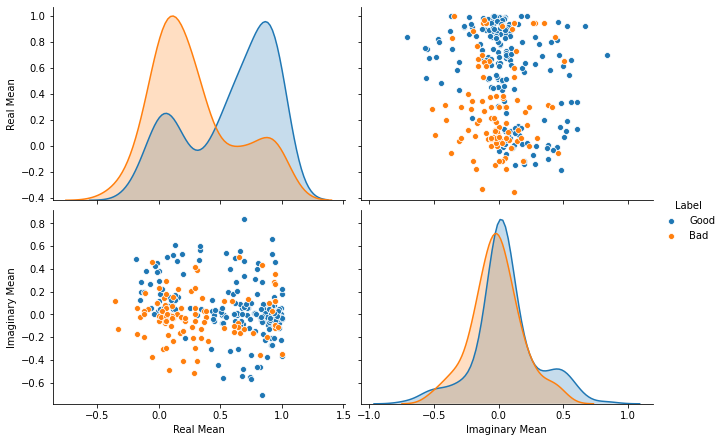

In [537]:
real_mean = np.mean(ionosphere_train[ionosphere_train.columns[0:-1:2]], axis=1)
im_mean = np.mean(ionosphere_train[ionosphere_train.columns[1::2]], axis=1)

dist_df = pd.concat([real_mean, im_mean, ionosphere_train['label']], axis=1)
dist_df.columns = ["Real Mean", "Imaginary Mean", "Label"]
dist_df["Label"][dist_df["Label"]=='g'] = "Good"
dist_df["Label"][dist_df["Label"]=='b'] = "Bad"
sns.pairplot(dist_df, hue='Label', height=3, aspect=1.5)

To further explore how the real and imaginary time series relate to eachother, plot Pearson's correlation coefficient between the real/imaginary components of each reading. In the bad examples we don't find any significant correlation for any pairing. However, in the good examples, we notice moderate correlation at time lags of 2 (-0.58), 3 (-0.72), 4 (-0.62), and 5 (-0.51). 

Because the first imaginary measurement is always 0, the correlation cannot be computed for a 0 time lag. 

In [538]:
good_ionosphere = ionosphere_train[ionosphere_train['label'] == 'g'].copy()
good_ionosphere.drop([0, 1, "label"], axis=1,  inplace=True)
bad_ionosphere = ionosphere_train[ionosphere_train['label'] == 'b'].copy()
bad_ionosphere.drop([0, 1, "label"], axis=1, inplace=True)

Text(0, 0.5, "Pearson's Correlation")

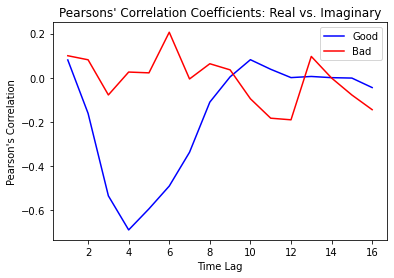

In [539]:
good_correlations = []
bad_correlations = []
for i in range(2, 33, 2):
    good_correlations.append(np.corrcoef(good_ionosphere[i], good_ionosphere[i+1])[1,0])
    bad_correlations.append(np.corrcoef(bad_ionosphere[i], bad_ionosphere[i+1])[1, 0])

fig = plt.figure()
plt.plot(np.arange(1, 17), good_correlations, "b", label="Good")
plt.plot(np.arange(1, 17), bad_correlations, "r", label="Bad")
plt.legend()
plt.title("Pearsons' Correlation Coefficients: Real vs. Imaginary")
plt.xlabel("Time Lag")
plt.ylabel("Pearson's Correlation")

To broaden our analysis, we explore the general correlations between all of the imaginary/real features. This reveals some very insightful structures in the data! One might expect that, in a time series, adjacent measurements are highly correlated (i.e. we assume the time series has some smoothness and does'nt fluctuate wildly between measurements). This is notable in the good examples wherein in a grid pattern emerges in the correlation heatmap. Any real measurement is highly correlated to the adjacent real measurements (i.e. the features "two away"). This correlation tapers off as we move further away.

However, in the bad examples there is virtually no structure to the correlation heatmap.

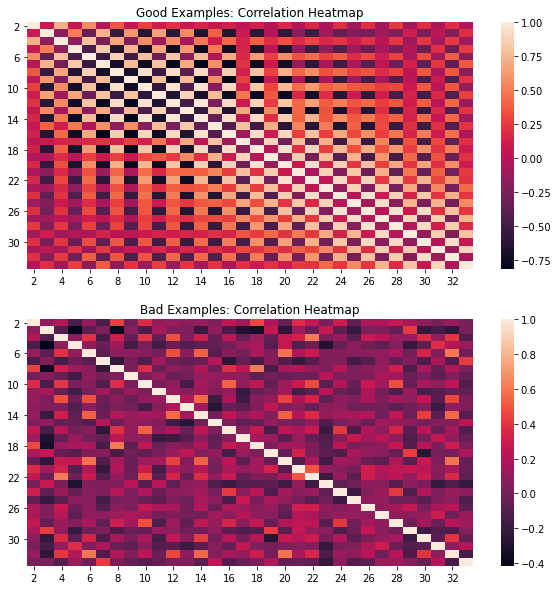

In [540]:
total_good_corr = good_ionosphere.corr() #because the first two columns are always 1 or 0, we don't analyze them
total_bad_corr = bad_ionosphere.corr()

fig2, ax2 = plt.subplots(2)
ax2[0].set_title("Good Examples: Correlation Heatmap")
ax2[1].set_title("Bad Examples: Correlation Heatmap")


sns.heatmap(total_good_corr, ax=ax2[0])
sns.heatmap(total_bad_corr, ax=ax2[1])


fig2.set_size_inches(10, 10)

Based on this insight, it might be valuable to explore the **autocorrelation** of the imaginary/real time series.

In [541]:
autocorr_real = []
autocorr_im = []

for example in ionosphere_train.drop("label", axis=1).iterrows():
    autocorr_real_sample = []
    autocorr_im_sample = []
    real_series = example[1][2:-1:2] # Skip first reading
    im_series = example[1][3:-1:2]
    for lag in range(1, 6):
        autocorr_real_sample.append(np.corrcoef(np.array([real_series[:-lag], real_series[lag:]]))[0,1])
        autocorr_im_sample.append(np.corrcoef(np.array([im_series[:-lag], im_series[lag:]]))[0,1])
    autocorr_real.append(autocorr_real_sample)
    autocorr_im.append(autocorr_im_sample)

C:\Users\Lenovo\Miniconda3\envs\ml\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Lenovo\Miniconda3\envs\ml\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [542]:
autocorr_real = pd.DataFrame(np.array(autocorr_real), columns=["Lag_1", "Lag_2", "Lag_3", "Lag_4", "Lag_5"])
autocorr_real["label"] = ionosphere_train["label"]

autocorr_im = pd.DataFrame(np.array(autocorr_im), columns=["Lag_1", "Lag_2", "Lag_3", "Lag_4", "Lag_5"])
autocorr_im["label"] = ionosphere_train["label"]

Some null values pop up. We impute these with the mean.

In [543]:
autocorr_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lag_1   289 non-null    float64
 1   Lag_2   288 non-null    float64
 2   Lag_3   286 non-null    float64
 3   Lag_4   282 non-null    float64
 4   Lag_5   280 non-null    float64
 5   label   298 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.1+ KB


In [544]:
autocorr_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lag_1   298 non-null    float64
 1   Lag_2   298 non-null    float64
 2   Lag_3   295 non-null    float64
 3   Lag_4   295 non-null    float64
 4   Lag_5   295 non-null    float64
 5   label   298 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.1+ KB


In [545]:
autocorr_real.fillna(np.mean(autocorr_real), axis=0, inplace=True)
autocorr_im.fillna(np.mean(autocorr_im), axis=0, inplace=True)

As expected, the good examples maintain a moderately correlated autocorrelation, particularly for lags of 1 and 2. The bad examples don't show any significant autocorrelation. 

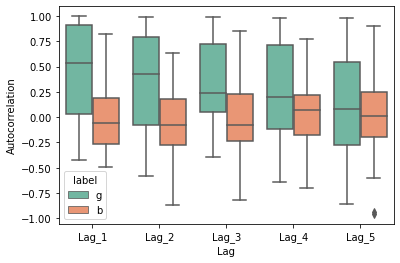

In [546]:
autocorr_real_melted = pd.melt(autocorr_real, id_vars=["label"], value_vars=["Lag_1", "Lag_2", "Lag_3", "Lag_4", "Lag_5"], var_name = "Lag", value_name = "Autocorrelation")
sns.boxplot(x="Lag", y="Autocorrelation", hue="label", data=autocorr_real_melted, palette="Set2")

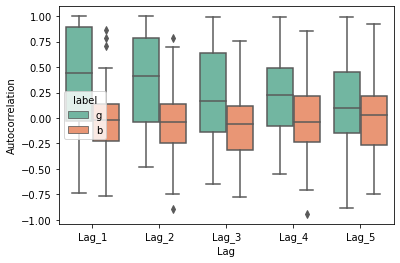

In [547]:
autocorr_im_melted = pd.melt(autocorr_im, id_vars=["label"], value_vars=["Lag_1", "Lag_2", "Lag_3", "Lag_4", "Lag_5"], var_name = "Lag", value_name = "Autocorrelation")
sns.boxplot(x="Lag", y="Autocorrelation", hue="label", data=autocorr_im_melted, palette="Set2")

In sum, from this statistical exploration, two viable new features have been engineered:
* Standard deviation of real/imaginary time series
* Autocorrelation of real/imaginary time series at varying time lags

We'll compose these into a general DataFrame for new features.

In [548]:
autocorr_real.drop("label", axis=1, inplace=True)
autocorr_real.columns=["Lag_1_Real", "Lag_2_Real", "Lag_3_Real", "Lag_4_Real", "Lag_5_Real"]
autocorr_im.drop("label", axis=1, inplace=True)
autocorr_im.columns=["Lag_1_Im", "Lag_2_Im", "Lag_3_Im", "Lag_4_Im", "Lag_5_Im"]
new_features_df = pd.concat([autocorr_real, autocorr_im, std_df], axis=1)

We also have to compute these features for our test set.

In [549]:
real_std = np.std(ionosphere_test[ionosphere_test.columns[0:-1:2]], axis=1)
im_std = np.std(ionosphere_test[ionosphere_test.columns[1:-1:2]], axis=1)
std_df = pd.DataFrame({'std_real': real_std, 'std_im': im_std}, dtype=float)

In [550]:
autocorr_real = []
autocorr_im = []

for example in ionosphere_test.drop("label", axis=1).iterrows():
    autocorr_real_sample = []
    autocorr_im_sample = []
    real_series = example[1][2:-1:2] # Skip first reading
    im_series = example[1][3:-1:2]
    for lag in range(1, 6):
        autocorr_real_sample.append(np.corrcoef(np.array([real_series[:-lag], real_series[lag:]]))[0,1])
        autocorr_im_sample.append(np.corrcoef(np.array([im_series[:-lag], im_series[lag:]]))[0,1])
    autocorr_real.append(autocorr_real_sample)
    autocorr_im.append(autocorr_im_sample)

C:\Users\Lenovo\Miniconda3\envs\ml\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Lenovo\Miniconda3\envs\ml\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [551]:
autocorr_real = pd.DataFrame(np.array(autocorr_real), columns=["Lag_1_Real", "Lag_2_Real", "Lag_3_Real", "Lag_4_Real", "Lag_5_Real"])
autocorr_im = pd.DataFrame(np.array(autocorr_im), columns=["Lag_1_Im", "Lag_2_Im", "Lag_3_Im", "Lag_4_Im", "Lag_5_Im"])

In [552]:
new_features_df_test = pd.concat([autocorr_real, autocorr_im, std_df], axis=1)
new_features_df_test.fillna(np.mean(new_features_df_test), axis=0, inplace=True)

Finally we should also separate the labels from the features and drop feature "1" since we saw it only contained zeros.

In [553]:
ionosphere_train_y = ionosphere_train["label"].copy()
ionosphere_train_y[ionosphere_train_y == "g"] = 1
ionosphere_train_y[ionosphere_train_y == "b"] = 0
ionosphere_train_y = np.array(ionosphere_train_y.astype('uint8'))
ionosphere_train.drop([1, "label"], inplace=True, axis=1)

ionosphere_test_y = ionosphere_test["label"].copy()
ionosphere_test_y[ionosphere_test_y == "g"] = 1
ionosphere_test_y[ionosphere_test_y == "b"] = 0
ionosphere_test_y = np.array(ionosphere_test_y.astype('uint8'))
ionosphere_test.drop([1, "label"], inplace=True, axis=1)

C:\Users\Lenovo\Miniconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Hyperparameter Tuning, Feature Selection by Cross-Validation

To start, we want to estimate feature importances. This will give us a more structured way of selecting our features; rather than choosing all possible subsets we can evaluate feature subsets from most to least important. To do this, we can use Random Forests; they estimate feature importance from the impurity decrease gained by applying thresholds on a certain feature across all the decision trees.  

In [556]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

feature_importance_est = Pipeline([
    ("sc", StandardScaler()),
    ("rf", RandomForestClassifier(max_depth=5, random_state=42))
])

ionosphere_train_all = pd.concat((ionosphere_train, new_features_df), axis=1)
ionosphere_test_all = pd.concat((ionosphere_test, new_features_df_test), axis=1)
feature_importance_est.fit(np.array(ionosphere_train_all), ionosphere_train_y)

Pipeline(steps=[('sc', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=5, random_state=42))])

In [557]:
sorted(zip(feature_importance_est.named_steps["rf"].feature_importances_, ionosphere_train_all.columns), reverse=True)

[(0.14902385301116777, 4),
 (0.08523813056410454, 2),
 (0.08065098260006319, 'std_im'),
 (0.06058517620979404, 26),
 (0.05566733492385757, 'Lag_2_Real'),
 (0.04721114235928848, 6),
 (0.04436886879520479, 'std_real'),
 (0.04255553914894694, 'Lag_1_Real'),
 (0.037721831793190226, 'Lag_1_Im'),
 (0.02866279449752153, 'Lag_2_Im'),
 (0.028136279122834566, 0),
 (0.02703251833516807, 7),
 (0.023921123131558843, 5),
 (0.01996724759488392, 14),
 (0.019443236245757105, 13),
 (0.018921190207828353, 32),
 (0.018006447167532053, 12),
 (0.01766539704429411, 3),
 (0.015686512182860345, 27),
 (0.01394806169646682, 21),
 (0.013455466063347896, 28),
 (0.01277068839346456, 30),
 (0.01268331746493763, 23),
 (0.012446716070139188, 'Lag_3_Real'),
 (0.010954077421252675, 20),
 (0.01058416300634634, 17),
 (0.010530180294819108, 15),
 (0.009306006463564975, 11),
 (0.008533208778968536, 'Lag_3_Im'),
 (0.007016670424380906, 31),
 (0.006941059737149988, 18),
 (0.004995252427824286, 25),
 (0.004978593648609277, 'La

In [558]:
feature_importance = [x for _, x in sorted(zip(feature_importance_est.named_steps["rf"].feature_importances_, ionosphere_train_all.columns), reverse=True)]

Using this, we have an estimate of the relative important of our new features:

To find the optimal number of features to include, we'll start by using the most important feature ("4") and slowly include more and more features to find the optimal blend of original/engineered features.

In [581]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from copy import deepcopy
                            
train_scores = []
val_scores = []
train_err = []
val_err = []
models = []

log_rg = Pipeline([
    ("sc", StandardScaler()),
    ("lr", LogisticRegression(max_iter=10000, penalty="elasticnet", solver="saga"))
])

grid_search = {
    "lr__C": [0.001, 0.01, 0.1, 1, 10], 
    "lr__l1_ratio": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
}

log_rg_cv = GridSearchCV(log_rg, grid_search, cv=5, return_train_score = True)

for i in range(1, len(feature_importance)):
    features_to_include = feature_importance[:i]
    train = np.array(ionosphere_train_all[features_to_include].copy())
    log_rg_cv.fit(train, ionosphere_train_y)
    
    best_ix = np.argmax(log_rg_cv.cv_results_["mean_test_score"])
    train_scores.append(log_rg_cv.cv_results_["mean_train_score"][best_ix])
    train_err.append(log_rg_cv.cv_results_["std_train_score"][best_ix])
    val_scores.append(log_rg_cv.cv_results_["mean_test_score"][best_ix])
    val_err.append(log_rg_cv.cv_results_["std_test_score"][best_ix])
    print(val_scores[-1])
    models.append(deepcopy(log_rg_cv))



0.8290960451977402
0.8191525423728813
0.8794350282485877
0.8928248587570622
0.9295480225988701
0.9228813559322034
0.9228813559322034
0.9396045197740113
0.9328248587570622
0.9396045197740113
0.9396045197740113
0.9427683615819209
0.9396045197740113
0.9396045197740113
0.9396045197740113
0.9396045197740113
0.9363276836158192
0.9328813559322034
0.936271186440678
0.9463841807909604
0.9396610169491526
0.9429943502824859
0.9429943502824859
0.9396610169491526
0.9396610169491526
0.9396610169491526
0.9363276836158192
0.9397175141242938
0.9296045197740114
0.9296045197740114
0.9296045197740114
0.9296610169491526
0.9396610169491526
0.9396610169491526
0.9329943502824859
0.9329378531073447
0.9363276836158192
0.9296610169491526
0.9396045197740113
0.9396045197740113
0.9430508474576271
0.9397175141242938
0.9397175141242938
0.9397175141242938


As a reference, let's also evaluate performance by just using the raw time series as features.

A huge difference was found by adding in the engineered features, increasing validation accuracy from 87.3% up to 94.6% in the best case. This optimal model model was found by including a blend of original time series points as well as the "std_im", "std_real", "Lag_1_Real", "Lag_2_Real", "Lag_1_Im", and "Lag_2_Im".

In [583]:
log_rg_cv.fit(np.array(ionosphere_train), ionosphere_train_y)
log_rg_cv.best_score_

0.872768361581921

In [584]:
best_ix = np.argmax(val_scores)
val_scores[best_ix]

0.9463841807909604

In [585]:
train_scores[best_ix]

0.9656024752997434

In [586]:
log_rg_cv_opt = models[best_ix]
log_rg_cv_opt.best_params_

{'lr__C': 1, 'lr__l1_ratio': 0.4}

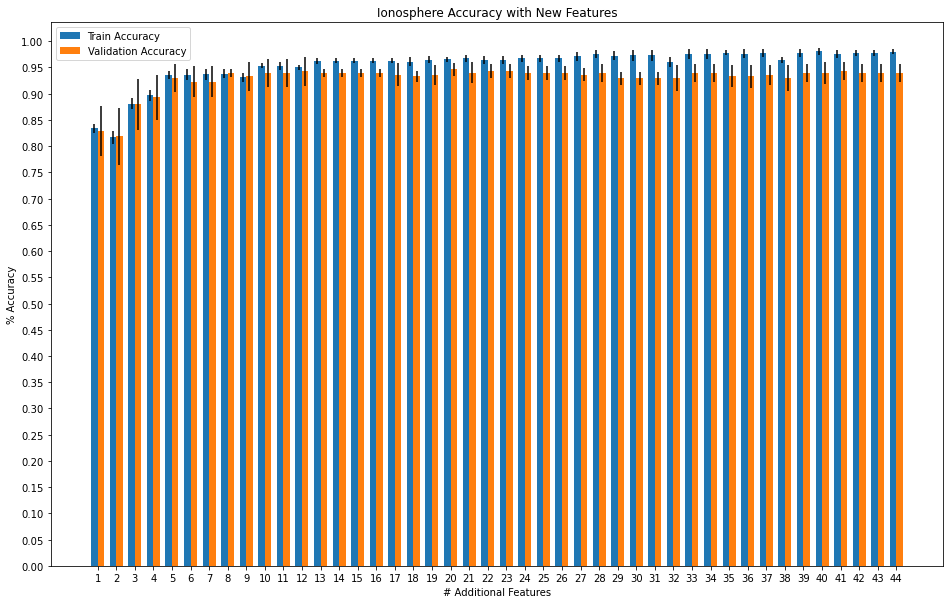

In [588]:
x=np.arange(1, len(feature_importance))
y=np.linspace(0, 1, 21)
width=0.35

fig, ax = plt.subplots()
train_bars = ax.bar(x - width/2, train_scores, width, linewidth=0.2, label='Train Accuracy', yerr=train_err)
val_bars = ax.bar(x + width/2, val_scores, width, linewidth=0.2, label='Validation Accuracy', yerr=val_err)

ax.set_ylabel('% Accuracy')
ax.set_xlabel("# Additional Features")
ax.set_title('Ionosphere Accuracy with New Features')
ax.set_xticks(x)
ax.set_yticks(y)
ax.legend()

fig.set_size_inches(16, 10)


Finally, we evaluate the mode on our test set.

***We achieve a test accuracy of 94.3%***

In [587]:
opt_features = feature_importance[:best_ix+1]
opt_features

[4,
 2,
 'std_im',
 26,
 'Lag_2_Real',
 6,
 'std_real',
 'Lag_1_Real',
 'Lag_1_Im',
 'Lag_2_Im',
 0,
 7,
 5,
 14,
 13,
 32,
 12,
 3,
 27,
 21]

In [589]:
ionosphere_test_opt = np.array(ionosphere_test_all[opt_features])
log_rg_cv_opt.score(ionosphere_test_opt, ionosphere_test_y)

0.9433962264150944